In [1]:
import pandas as pd

# Load the CSV data into a pandas DataFrame
file_path = (r"C:\Users\heman\Downloads\archive (2).zip")
data = pd.read_csv(file_path)

# Display basic information about the data
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB
None
   Transaction ID        Date Product Category             Product Name  \
0           10001  2024-01-01      Electronics            iPhone 14 Pro   
1           10002  2024-01-02  Home Appliances         Dyson V11 Vacuum   
2           10003  2024-01-03         Clothing         Levi's 501 Jeans   
3          

In [2]:
# Get summary statistics of the data
print(data.describe())


       Transaction ID  Units Sold   Unit Price  Total Revenue
count       240.00000  240.000000   240.000000     240.000000
mean      10120.50000    2.158333   236.395583     335.699375
std          69.42622    1.322454   429.446695     485.804469
min       10001.00000    1.000000     6.500000       6.500000
25%       10060.75000    1.000000    29.500000      62.965000
50%       10120.50000    2.000000    89.990000     179.970000
75%       10180.25000    3.000000   249.990000     399.225000
max       10240.00000   10.000000  3899.990000    3899.990000


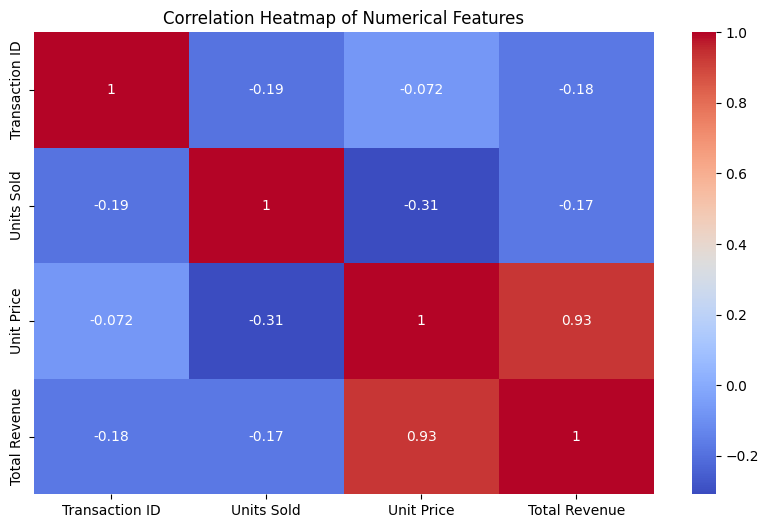

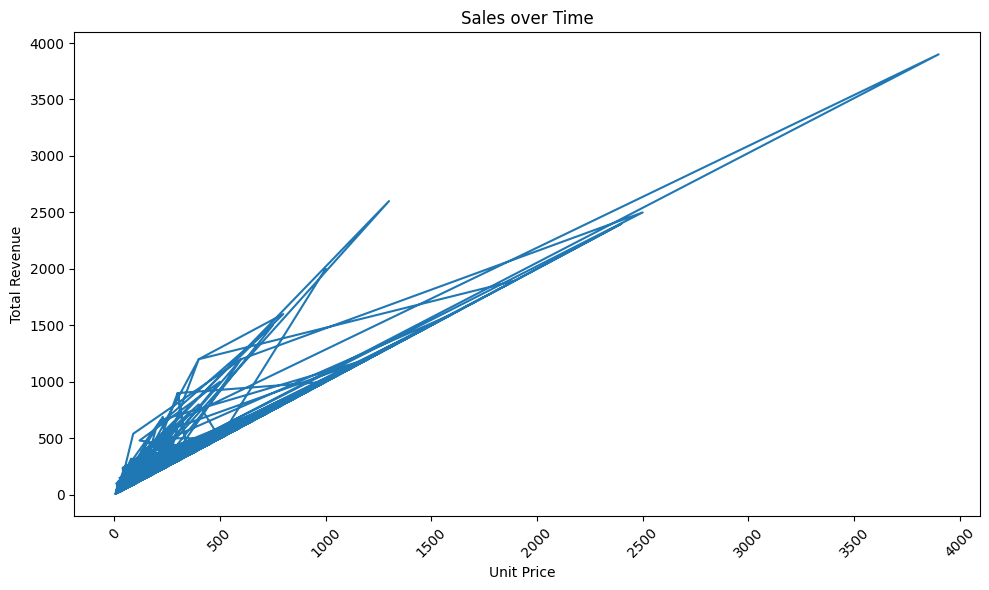

In [2]:

   import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have already loaded the data in a DataFrame called 'data'

# Exclude non-numeric columns like 'Date' before computing correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Visualize the correlation between numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


if 'Unit Price' in data.columns and 'Total Revenue' in data.columns:  
    data['Date'] = pd.to_datetime(data['Date'])  
    plt.figure(figsize=(10, 6))
    plt.plot(data['Unit Price'], data['Total Revenue']) 
    plt.xlabel('Unit Price  ')
    plt.ylabel('Total Revenue')
    plt.title('Sales over Time')
    plt.xticks(rotation=45)  
    plt.tight_layout()  
    plt.show()
else:
    print("Make sure the 'Date' and 'Sales' columns exist in the dataset.")


In [12]:
# Check for missing values
print(data.isnull().sum())

# Drop rows or columns with a high percentage of missing values or fill missing values
data = data.dropna() 


Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64


In [13]:
# Example of encoding categorical features
data = pd.get_dummies(data, drop_first=True)  

In [3]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])


In [15]:
from sklearn.model_selection import train_test_split

# Assuming 'Sales' is the target variable you want to predict
X = data.drop('Total Revenue', axis=1)  
y = data['Total Revenue'] 

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Check the data types of the features in X_train
print(X_train.dtypes)


X_train = X_train.select_dtypes(include=['float64', 'int64'])  
X_test = X_test.select_dtypes(include=['float64', 'int64'])


Transaction ID                              float64
Date                                 datetime64[ns]
Units Sold                                  float64
Unit Price                                  float64
Product Category_Books                         bool
                                          ...      
Product Name_iRobot Braava Jet M6              bool
Region_Europe                                  bool
Region_North America                           bool
Payment Method_Debit Card                      bool
Payment Method_PayPal                          bool
Length: 244, dtype: object


In [19]:
# Check the data types of X_train and y_train
print(X_train.dtypes)
print(y_train.dtype)


Transaction ID    float64
Units Sold        float64
Unit Price        float64
dtype: object
float64


In [20]:
# Use one-hot encoding for categorical variables (if any)
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)


In [21]:
# Ensure X_train and X_test have the same columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [22]:
y_train = pd.to_numeric(y_train, errors='coerce')
y_test = pd.to_numeric(y_test, errors='coerce')


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.0868184125189174
R-squared: 0.8883202398787746


In [24]:
from sklearn.tree import DecisionTreeRegressor

# Train and evaluate Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Calculate metrics
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f'Decision Tree - MSE: {mse_dt}, R-squared: {r2_dt}')


Decision Tree - MSE: 0.0289953906918017, R-squared: 0.9627014802145105


In [25]:
from sklearn.ensemble import RandomForestRegressor

# Train and evaluate Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Calculate metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest - MSE: {mse_rf}, R-squared: {r2_rf}')


Random Forest - MSE: 0.04240033822065097, R-squared: 0.9454578877434631


In [26]:
from sklearn.svm import SVR

# Train and evaluate Support Vector Regressor model
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

# Calculate metrics
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f'Support Vector Regression - MSE: {mse_svr}, R-squared: {r2_svr}')


Support Vector Regression - MSE: 0.20990064235850991, R-squared: 0.729992144433859


In [3]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data_path = r"C:\Users\sayen\OneDrive\Desktop\Online Sales Data.csv"
sales_data = pd.read_csv(data_path)

# Display first few rows to understand the structure
print(sales_data.head())

# Step 1: Data Preprocessing
# Checking for missing values
print(sales_data.isnull().sum())

# Selecting features and target
X = sales_data.drop(columns=["Transaction ID", "Date", "Total Revenue"]) 
y = sales_data["Total Revenue"]  

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



umeric_features = ["Units Sold", "Unit Price"]
categorical_features = ["Product Category", "Product Name", "Region", "Payment Method"]


numeric_transformer = SimpleImputer(strategy="mean")


categorical_transformer = Pipeline(steps=[ 
    ("onehot", OneHotEncoder(handle_unknown="ignore"))  
])


preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),  
        ("cat", categorical_transformer, categorical_features)  
    ])

# Step 2: Model Building

model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),  
    ("regressor", RandomForestRegressor(random_state=42))  
])

# Step 3: Model Training

model_pipeline.fit(X_train, y_train)

# Step 4: Model Evaluation

y_pred = model_pipeline.predict(X_test)

# Step 5: Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred) 


print(f"Model Performance on Test Set:\nMean Squared Error: {mse:.2f}\nR-squared: {r2:.2f}")


   Transaction ID        Date Product Category             Product Name  \
0           10001  2024-01-01      Electronics            iPhone 14 Pro   
1           10002  2024-01-02  Home Appliances         Dyson V11 Vacuum   
2           10003  2024-01-03         Clothing         Levi's 501 Jeans   
3           10004  2024-01-04            Books        The Da Vinci Code   
4           10005  2024-01-05  Beauty Products  Neutrogena Skincare Set   

   Units Sold  Unit Price  Total Revenue         Region Payment Method  
0           2      999.99        1999.98  North America    Credit Card  
1           1      499.99         499.99         Europe         PayPal  
2           3       69.99         209.97           Asia     Debit Card  
3           4       15.99          63.96  North America    Credit Card  
4           1       89.99          89.99         Europe         PayPal  
Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
U

   Transaction ID       Date Product Category             Product Name  \
0           10001 2024-01-01      Electronics            iPhone 14 Pro   
1           10002 2024-01-02  Home Appliances         Dyson V11 Vacuum   
2           10003 2024-01-03         Clothing         Levi's 501 Jeans   
3           10004 2024-01-04            Books        The Da Vinci Code   
4           10005 2024-01-05  Beauty Products  Neutrogena Skincare Set   

   Units Sold  Unit Price  Total Revenue         Region Payment Method  
0           2      999.99        1999.98  North America    Credit Card  
1           1      499.99         499.99         Europe         PayPal  
2           3       69.99         209.97           Asia     Debit Card  
3           4       15.99          63.96  North America    Credit Card  
4           1       89.99          89.99         Europe         PayPal  


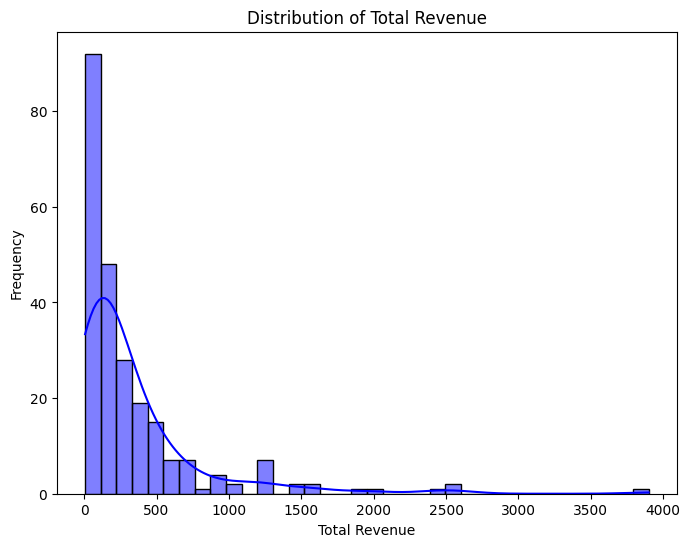

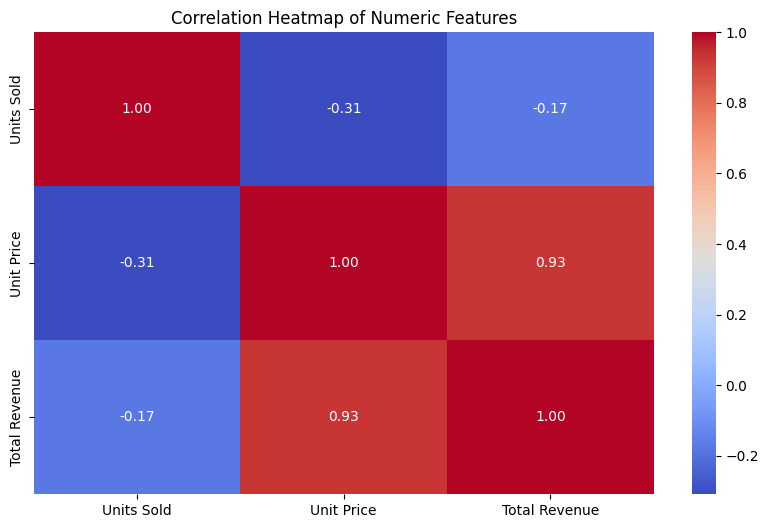

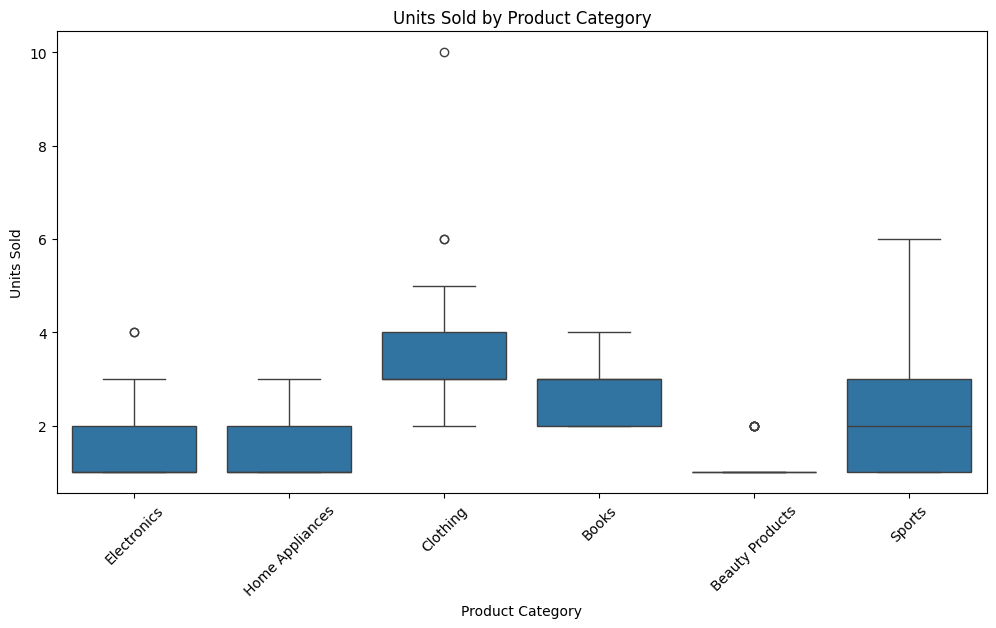

C:\Users\heman\AppData\Local\Temp\ipykernel_16236\108827055.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Region", y="Total Revenue", data=sales_data, estimator=sum, ci=None)


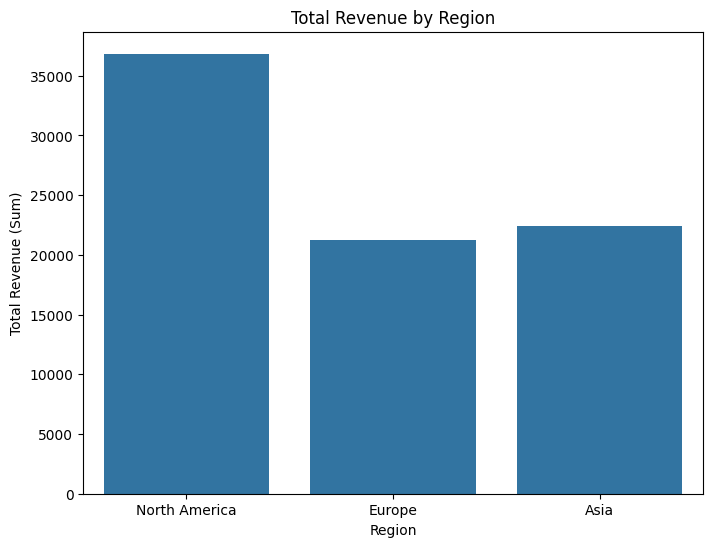

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64
Model Performance on Test Set:
Mean Squared Error: 12257.01
R-squared: 0.93


In [9]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset

sales_data = pd.read_excel(r"C:\Users\heman\OneDrive\Desktop\WEEK-4\Online Sales Data.xlsx")

# Display first few rows
print(sales_data.head())

# Step 1: Data Exploration and Visualization

# 1.1 Plotting Distribution of 'Total Revenue'
plt.figure(figsize=(8, 6))
sns.histplot(sales_data["Total Revenue"], kde=True, color='blue')
plt.title("Distribution of Total Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Frequency")
plt.show()

# 1.2 Correlation heatmap for numeric features
plt.figure(figsize=(10, 6))
corr = sales_data[["Units Sold", "Unit Price", "Total Revenue"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# 1.3 Boxplot for Units Sold by Product Category
plt.figure(figsize=(12, 6))
sns.boxplot(x="Product Category", y="Units Sold", data=sales_data)
plt.xticks(rotation=45)
plt.title("Units Sold by Product Category")
plt.show()

# 1.4 Total Revenue by Region
plt.figure(figsize=(8, 6))
sns.barplot(x="Region", y="Total Revenue", data=sales_data, estimator=sum, ci=None)
plt.title("Total Revenue by Region")
plt.ylabel("Total Revenue (Sum)")
plt.show()

# Step 2: Data Preprocessing
# Checking for missing values
print(sales_data.isnull().sum())


X = sales_data.drop(columns=["Transaction ID", "Date", "Total Revenue"]) 
y = sales_data["Total Revenue"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


numeric_features = ["Units Sold", "Unit Price"]
categorical_features = ["Product Category", "Product Name", "Region", "Payment Method"]


numeric_transformer = SimpleImputer(strategy="mean")


categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),  
    ("onehot", OneHotEncoder(handle_unknown="ignore"))  
])


preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),  
        ("cat", categorical_transformer, categorical_features)  
    ])

# Step 3: Model Building

model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor), 
    ("regressor", RandomForestRegressor(random_state=42))  
])

# Step 4: Model Training

model_pipeline.fit(X_train, y_train)

# Step 5: Model Evaluation

y_pred = model_pipeline.predict(X_test)

# Step 6: Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred) 

print(f"Model Performance on Test Set:\nMean Squared Error: {mse:.2f}\nR-squared: {r2:.2f}")


feature_names = numeric_features + list(model_pipeline.named_steps["preprocessor"].transformers_[1][1]["onehot"].get_feature_names_out())
importances = model_pipeline.named_steps["regressor"].feature_importances_

# Create a dataframe to store feature importances
feature_importances = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

